# Oscar Prediction 2020 Part II - Modeling

In [108]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import LeaveOneOut
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as sklmetrics
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import r2_score, classification_report, roc_auc_score

In [ ]:
pd.options.display.max_rows = 168
pd.options.display.max_columns = 23

In [15]:
#delete
oscar_picture=pd.read_csv('4.csv')
oscar_picture

,Unnamed: 0,nominees,details,imdb_urls,award_show,year,award,winner,ref_year,metabase,...,American Cinema Editors,BAFTA,Chicago Film Critics,Critics Choice,Golden Globes,Satellite,date,tt,tomatoURL,avg_score
0,0,1917,"Sam Mendes, Pippa Harris, Jayne-Ann Tenggren, ...",https://www.imdb.com//title/tt8579674/?ref_=ev...,Academy Awards,2020,Best Motion Picture of the Year,1,1,78,...,-1.0,1.0,-1.0,0.0,1.0,-1.0,"February 9, 2020",tt8579674,https://www.rottentomatoes.com/m/1917_2019,0.838919
1,1,Ford v Ferrari,"Peter Chernin, Jenno Topping, James Mangold",https://www.imdb.com//title/tt1950186/?ref_=ev...,Academy Awards,2020,Best Motion Picture of the Year,0,1,81,...,0.0,-1.0,-1.0,0.0,-1.0,-1.0,"February 9, 2020",tt1950186,https://www.rottentomatoes.com/m/ford_v_ferrari,0.788045
2,2,Jojo Rabbit,"Carthew Neal, Taika Waititi",https://www.imdb.com//title/tt2584384/?ref_=ev...,Academy Awards,2020,Best Motion Picture of the Year,0,1,58,...,1.0,-1.0,-1.0,0.0,0.0,-1.0,"February 9, 2020",tt2584384,https://www.rottentomatoes.com/m/jojo_rabbit,0.758529
3,3,Joker,"Todd Phillips, Bradley Cooper, Emma Tillinger ...",https://www.imdb.com//title/tt7286456/?ref_=ev...,Academy Awards,2020,Best Motion Picture of the Year,0,1,59,...,0.0,0.0,-1.0,0.0,0.0,-1.0,"February 9, 2020",tt7286456,https://www.rottentomatoes.com/m/joker_2019,0.738650
4,4,Little Women,Amy Pascal,https://www.imdb.com//title/tt3281548/?ref_=ev...,Academy Awards,2020,Best Motion Picture of the Year,0,1,91,...,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,"February 9, 2020",tt3281548,https://www.rottentomatoes.com/m/little_women_...,0.843571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,156,Shine,Jane Scott,https://www.imdb.com//title/tt0117631/?ref_=ev...,Academy Awards,1997,Best Picture,0,24,87,...,-1.0,0.0,-1.0,0.0,0.0,-1.0,"March 24, 1997",tt0117631,http://www.rottentomatoes.com/m/shine/,NaN
157,157,Braveheart,"Mel Gibson, Alan Ladd Jr., Bruce Davey",https://www.imdb.com//title/tt0112573/?ref_=ev...,Academy Awards,1996,Best Picture,1,25,68,...,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,"March 25, 1996",tt0112573,http://www.rottentomatoes.com/m/1065684-braveh...,NaN
158,158,Apollo 13,Brian Grazer,https://www.imdb.com//title/tt0112384/?ref_=ev...,Academy Awards,1996,Best Picture,0,25,77,...,-1.0,-1.0,1.0,0.0,0.0,-1.0,"March 25, 1996",tt0112384,http://www.rottentomatoes.com/m/apollo_13/,NaN
159,159,Babe,"George Miller, Doug Mitchell, Bill Miller",https://www.imdb.com//title/tt0112431/?ref_=ev...,Academy Awards,1996,Best Picture,0,25,83,...,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,"March 25, 1996",tt0112431,http://www.rottentomatoes.com/m/1065598-babe/,NaN


In [16]:
all_picture2 = oscar_picture

## 1. Normalize the Data

In [19]:
all_picture3=all_picture2[all_picture2['year'] != 2020]
all_picture3=all_picture3[['winner','metabase','rating','budget','gross','minute','American Cinema Editors','BAFTA','Chicago Film Critics','Critics Choice','Golden Globes','Satellite','avg_score']].dropna()
all_picture31=pd.DataFrame(preprocessing.scale(all_picture3.drop('winner', axis = 1)))
all_picture31 = all_picture31.set_axis(['metabase','rating','budget','gross','minute','American Cinema Editors','BAFTA','Chicago Film Critics','Critics Choice','Golden Globes','Satellite','avg_score'], axis=1, inplace=False)
all_picture31

D:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


,metabase,rating,budget,gross,minute,American Cinema Editors,BAFTA,Chicago Film Critics,Critics Choice,Golden Globes,Satellite,avg_score
0,-1.311078,1.083332,-0.432856,0.145212,0.031913,0.364812,0.370530,-0.359303,-0.109670,1.628183,-0.415648,-1.445719
1,0.636655,-0.139785,-0.165025,0.435654,0.297194,0.364812,0.370530,-0.359303,-0.109670,0.240053,-0.415648,0.124591
2,0.124094,-0.629032,-0.597676,-0.499430,0.252981,0.364812,0.370530,-0.359303,-0.109670,0.240053,-0.415648,0.416814
3,0.636655,-1.118278,3.213772,2.920000,0.208767,-1.062246,-1.078895,-0.359303,-0.109670,0.240053,-0.415648,0.307944
4,-3.361323,0.594085,0.164614,1.710846,0.208767,1.791870,-1.078895,-0.359303,-2.193398,1.628183,-0.415648,-3.583592
...,...,...,...,...,...,...,...,...,...,...,...,...
128,-2.131176,2.061826,0.329433,0.028143,2.640506,-1.062246,-1.078895,-0.359303,-0.109670,-1.148078,-0.415648,-0.324486
129,0.226606,0.104839,-0.768421,-0.589753,1.225676,0.364812,-1.078895,1.916281,-0.109670,0.240053,-0.415648,1.296002
130,-1.823639,0.838709,-0.357013,1.081118,-0.984995,0.364812,0.370530,-0.359303,-0.109670,-1.148078,-0.415648,-0.805612
131,0.944192,2.061826,0.535458,0.561575,1.756237,-1.062246,0.370530,4.191864,1.974059,1.628183,-0.415648,-3.428795


In [20]:
all_picture3['winner'].value_counts()

0    112
1     21
Name: winner, dtype: int64

## 2. Split the Data

In [22]:
# Separate X (input features) and Y (outcome)
all_picture_X = all_picture31
all_picture_Y = all_picture3['winner']

In [23]:
# Split into training data and test data
all_picture_train_X, all_picture_test_X, all_picture_train_Y, all_picture_test_Y = train_test_split(all_picture_X, 
                                                                        all_picture_Y, 
                                                                        random_state = 123, 
                                                                        train_size = 0.7)

In [24]:
print(len(all_picture_X), len(all_picture_train_X), len(all_picture_test_X))

133 93 40


## 3. Modeling

### 3.1 Logistic Regression

In [50]:
log_regression_model = LogisticRegression(class_weight = 'balanced')
log_regression_model = log_regression_model.fit(all_picture_train_X,all_picture_train_Y)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [51]:
predict_Y = log_regression_model.predict(all_picture_test_X)

In [52]:
# Accuracy
sklmetrics.accuracy_score(all_picture_test_Y, predict_Y)
sklmetrics.cohen_kappa_score(all_picture_test_Y, y_pred)

0.15662650602409645

In [53]:
# Confusion Matrix
conf_mat = sklmetrics.confusion_matrix(all_picture_test_Y, predict_Y, labels =[0,1])
conf_mat

array([[28,  5],
       [ 2,  5]], dtype=int64)

Text(33.0, 0.5, 'True Value')

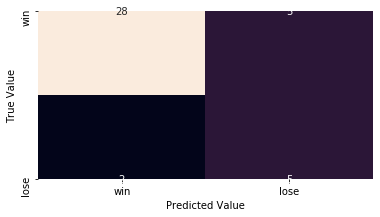

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(conf_mat, square=True, annot=True, cbar = False, 
            xticklabels = ['win','lose'], yticklabels = ['win','lose'],
            fmt='g')
plt.xlabel("Predicted Value")
plt.ylabel("True Value")

In [55]:
# Defining a function to plot coefficients as feature importance
# INPUT: Used for Logistic Regression Classifier
#        Feature Names
# OUTPUT: A plot of top most Coefficients
def plot_feature_importance_coeff(model, Xnames, cls_nm = None):

    imp_features = pd.DataFrame(np.column_stack((Xnames, model.coef_.ravel())), columns = ['feature', 'importance'])
    imp_features[['importance']] = imp_features[['importance']].astype(float)
    imp_features[['abs_importance']] = imp_features[['importance']].abs()
    # Sort the features based on absolute value of importance
    imp_features = imp_features.sort_values(by = ['abs_importance'], ascending = [1])
    
    # Plot the feature importances of the forest
    plt.figure()
    plt.title(cls_nm + " - Feature Importance")
    plt.barh(range(imp_features.shape[0]), imp_features['importance'],
            color="b", align="center")
    plt.yticks(range(imp_features.shape[0]), imp_features['feature'], )
    plt.ylim([-1, imp_features.shape[0]])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout() 
    plt.savefig(cls_nm + "_feature_imp.png", bbox_inches='tight')
    plt.show()

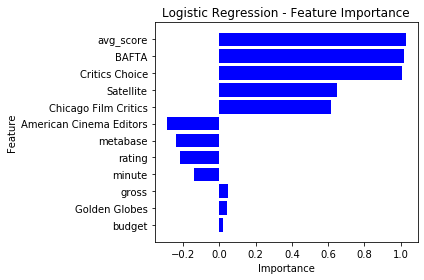

In [56]:
plot_feature_importance_coeff(log_regression_model, all_picture_X.columns, cls_nm="Logistic Regression")

### 3.1.1 Prediction

In [57]:
all_picture4=all_picture2[all_picture2['year']==2020]
all_picture4

,Unnamed: 0,nominees,details,imdb_urls,award_show,year,award,winner,ref_year,metabase,...,American Cinema Editors,BAFTA,Chicago Film Critics,Critics Choice,Golden Globes,Satellite,date,tt,tomatoURL,avg_score
0,0,1917,"Sam Mendes, Pippa Harris, Jayne-Ann Tenggren, ...",https://www.imdb.com//title/tt8579674/?ref_=ev...,Academy Awards,2020,Best Motion Picture of the Year,1,1,78,...,-1.0,1.0,-1.0,0.0,1.0,-1.0,"February 9, 2020",tt8579674,https://www.rottentomatoes.com/m/1917_2019,0.838919
1,1,Ford v Ferrari,"Peter Chernin, Jenno Topping, James Mangold",https://www.imdb.com//title/tt1950186/?ref_=ev...,Academy Awards,2020,Best Motion Picture of the Year,0,1,81,...,0.0,-1.0,-1.0,0.0,-1.0,-1.0,"February 9, 2020",tt1950186,https://www.rottentomatoes.com/m/ford_v_ferrari,0.788045
2,2,Jojo Rabbit,"Carthew Neal, Taika Waititi",https://www.imdb.com//title/tt2584384/?ref_=ev...,Academy Awards,2020,Best Motion Picture of the Year,0,1,58,...,1.0,-1.0,-1.0,0.0,0.0,-1.0,"February 9, 2020",tt2584384,https://www.rottentomatoes.com/m/jojo_rabbit,0.758529
3,3,Joker,"Todd Phillips, Bradley Cooper, Emma Tillinger ...",https://www.imdb.com//title/tt7286456/?ref_=ev...,Academy Awards,2020,Best Motion Picture of the Year,0,1,59,...,0.0,0.0,-1.0,0.0,0.0,-1.0,"February 9, 2020",tt7286456,https://www.rottentomatoes.com/m/joker_2019,0.738650
4,4,Little Women,Amy Pascal,https://www.imdb.com//title/tt3281548/?ref_=ev...,Academy Awards,2020,Best Motion Picture of the Year,0,1,91,...,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,"February 9, 2020",tt3281548,https://www.rottentomatoes.com/m/little_women_...,0.843571
5,5,Marriage Story,"Noah Baumbach, David Heyman",https://www.imdb.com//title/tt7653254/?ref_=ev...,Academy Awards,2020,Best Motion Picture of the Year,0,1,93,...,0.0,-1.0,-1.0,0.0,0.0,-1.0,"February 9, 2020",tt7653254,https://www.rottentomatoes.com/m/marriage_stor...,0.851186
6,6,Once Upon a Time... in Hollywood,"David Heyman, Shannon McIntosh, Quentin Tarantino",https://www.imdb.com//title/tt7131622/?ref_=ev...,Academy Awards,2020,Best Motion Picture of the Year,0,1,83,...,0.0,0.0,-1.0,1.0,1.0,-1.0,"February 9, 2020",tt7131622,https://www.rottentomatoes.com/m/once_upon_a_t...,0.794190
7,7,Parasite,"Sin-ae Kwak, Bong Joon Ho",https://www.imdb.com//title/tt6751668/?ref_=ev...,Academy Awards,2020,Best Motion Picture of the Year,0,1,96,...,1.0,0.0,-1.0,0.0,-1.0,-1.0,"February 9, 2020",tt6751668,https://www.rottentomatoes.com/m/parasite_2019,0.906155
8,8,The Irishman,"Martin Scorsese, Robert De Niro, Jane Rosentha...",https://www.imdb.com//title/tt1302006/?ref_=ev...,Academy Awards,2020,Best Motion Picture of the Year,0,1,94,...,0.0,0.0,-1.0,0.0,0.0,-1.0,"February 9, 2020",tt1302006,https://www.rottentomatoes.com/m/the_irishman_...,0.864167


In [76]:
all_picture4_1=all_picture4[['metabase','rating','budget','gross','minute','American Cinema Editors','BAFTA','Chicago Film Critics','Critics Choice','Golden Globes','Satellite','avg_score']].dropna()
all_picture4_s=preprocessing.scale(all_picture4_1)

predict_Y_4 = log_regression_model.predict_proba(all_picture4_s)
predict_Y_4

D:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


array([[0.20697052, 0.79302948],
       [0.96391345, 0.03608655],
       [0.97194096, 0.02805904],
       [0.91294915, 0.08705085],
       [0.85535929, 0.14464071],
       [0.88857213, 0.11142787],
       [0.11999226, 0.88000774],
       [0.57930059, 0.42069941],
       [0.63115344, 0.36884656]])

In [59]:
predict_Y_5 = log_regression_model.predict(all_picture4_s)
predict_Y_5

array([1, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

## 3.2 Naive Bayes

In [60]:
# Fitting Naive Bayes to the Training set
NB = GaussianNB()
NBMod = NB.fit(all_picture_train_X,all_picture_train_Y)

# Predicting the Test set results
y_pred = NBMod.predict(all_picture_test_X)

In [61]:
sklmetrics.accuracy_score(all_picture_test_Y, y_pred)
sklmetrics.cohen_kappa_score(all_picture_test_Y, y_pred)

0.35779816513761475

In [62]:
# Making the Confusion Matrix
nbcm = confusion_matrix(all_picture_test_Y, y_pred)
nbcm

array([[30,  3],
       [ 4,  3]], dtype=int64)

In [63]:
predict_Y_6 = NBMod.predict_proba(all_picture4_s)
predict_Y_6

array([[7.71184058e-01, 2.28815942e-01],
       [9.99986037e-01, 1.39629191e-05],
       [9.99999500e-01, 5.00409072e-07],
       [9.99973009e-01, 2.69909746e-05],
       [9.99773804e-01, 2.26195986e-04],
       [9.99369894e-01, 6.30106196e-04],
       [6.09045269e-02, 9.39095473e-01],
       [9.06619856e-01, 9.33801439e-02],
       [9.11786498e-01, 8.82135020e-02]])

In [64]:
predict_Y_7 = NBMod.predict(all_picture4_s)
predict_Y_7

array([0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

## 3.3 Random Forest

In [65]:
# Fitting Random Forest Classification to the Training set
randomforest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfmod = randomforest.fit(all_picture_train_X,all_picture_train_Y)

# Predicting the Test set results
y_pred = rfmod.predict(all_picture_test_X)

In [66]:
sklmetrics.accuracy_score(all_picture_test_Y, y_pred)
sklmetrics.cohen_kappa_score(all_picture_test_Y, y_pred)

0.15662650602409645

In [67]:
# Making the Confusion Matrix
rfcm = confusion_matrix(all_picture_test_Y, y_pred)
rfcm

array([[32,  1],
       [ 6,  1]], dtype=int64)

In [68]:
predict_Y_8 = randomforest.predict_proba(all_picture4_s)
predict_Y_8

array([[0.9, 0.1],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0.9, 0.1],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.8, 0.2]])

In [69]:
predict_Y_8 = randomforest.predict(all_picture4_s)
predict_Y_8

array([0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [70]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 21 members, which is too few. The minimum number of members in any class cannot be less than n_splits=107.
  % (min_groups, self.n_splits)), Warning)


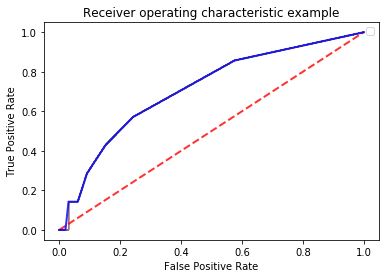

0.7106782106782107


In [71]:
cv = StratifiedKFold(n_splits=107)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(all_picture_X, all_picture_Y):
    probas_ = randomforest.fit(all_picture_train_X,all_picture_train_Y).predict_proba(all_picture_test_X)
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(all_picture_test_Y, probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend('')
plt.show()
print(mean_auc)

In [79]:
def sklearn_model_fn(predictor):
    def fn_template(train_x, train_y, test_x):
        model = predictor.fit(train_x, train_y)
        return model, model.predict_proba(test_x)[:, 1].tolist()
    return fn_template

In [106]:
def get_scores(columns, imps):
    scores_dict = dict(zip(list(columns),
                           list(np.array(imps).mean(axis=0))))
    return sorted(scores_dict.items(),
                  key=lambda x: -x[1])

def evaluate(get_predictions_fn, get_importances_fn, model_data):

    model_data=model_data[['winner','nominees','year','metabase','rating','budget','gross','minute','American Cinema Editors','BAFTA','Chicago Film Critics','Critics Choice','Golden Globes','Satellite','avg_score']].dropna()
    model_x=pd.DataFrame(preprocessing.scale(model_data.drop(['winner','nominees','year'], axis = 1)))
    model_x = model_x.set_axis(['metabase','rating','budget','gross','minute','American Cinema Editors','BAFTA','Chicago Film Critics','Critics Choice','Golden Globes','Satellite','avg_score'], axis=1, inplace=False)

    model_x = model_x
    model_y = model_data['winner']

    logo = LeaveOneGroupOut()
    feature_importances = []
    all_predictions, all_y, years, titles = [], [], [], []
    for train, test in logo.split(model_x, model_y, groups=model_data['year']):
        train_x = model_x.iloc[train]
        train_y = model_y.iloc[train]
        test_x = model_x.iloc[test]
        test_y = model_y.iloc[test]
        model, predictions = get_predictions_fn(train_x, train_y, test_x)
        feature_importances.append(get_importances_fn(model))
        all_predictions += predictions
        all_y += test_y.tolist()
        years += model_data['year'].iloc[test].tolist()
        titles += model_data['nominees'].iloc[test].tolist()
    result = pd.DataFrame({'year': years, 'nominees': titles, 'pred_score': all_predictions, 'winner': all_y})
    result['pred_winner'] = (result.groupby('year')['pred_score'].transform(max) == result['pred_score']).apply(int)
    auc = roc_auc_score(result['winner'], result['pred_score'])
    precision = result[result.winner == 1]['pred_winner'].mean()
    print(f"Auc: {auc:.3}, Precision: {precision:.3}")
    return result, get_scores(model_x.columns, feature_importances)

In [113]:
result, feature_scores = evaluate(sklearn_model_fn(LogisticRegression()),
                                  lambda model: list(model.coef_[0]),
                                  all_picture2)

D:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0

Auc: 0.792, Precision: 0.636


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [111]:
result, feature_scores = evaluate(sklearn_model_fn(RandomForestClassifier()),
                                  lambda model: list(model.feature_importances_),
                                  all_picture2)

D:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Auc: 0.78, Precision: 0.591


In [114]:
print(result.sort_values(by=['year', 'pred_score']).to_string())

     year                                           nominees  pred_score  winner  pred_winner
0    1998                                            Titanic    0.041979       1            1
1    1999                                Saving Private Ryan    0.286824       0            1
3    2000                              The Cider House Rules    0.015332       0            0
4    2000                                     The Green Mile    0.067487       0            0
5    2000                                        The Insider    0.093279       0            0
6    2000                                    The Sixth Sense    0.260565       0            0
2    2000                                    American Beauty    0.983721       1            1
10   2001                                            Traffic    0.169728       0            0
9    2001                                    Erin Brockovich    0.251901       0            0
8    2001                     Crouching Tiger, Hidden Dragon